<div style='color:white;font-size:30px;background-color:#196363;text-align:center;padding-top:20px; padding-bottom:20px;margin-bottom:40px'>VERSIFICATION & AUTHORSHIP ATTRIBUTION</div>
<h1>2.3.1 Burrows' Delta<br>
<br>model situation: recognizing G. G. Byron and W. Scott</h1>
<h2 style='margin-bottom: 50px'>Replication code</h2>

In [22]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from collections import defaultdict
from scipy.stats import zscore

<h3>Read data from JSON</h3>

In [23]:
#----------------------------------------------------------------------------------------------------------#
# File contains a dict with following structure:                                                           #   
# {                                                                                                        #
#     'marmion': list of words (tokens) in Scott's Marmion,                                                #
#     'lady': list of words (tokens) in Scott's Lady of the Lake                                           #
#     'childe': list of words (tokens) in Byron's Childe Harold,                                           #
# }                                                                                                        #
# Dataset comes from Gutenberg project (https://www.gutenberg.org/).                                       #
# Tokenization provided by TreeTagger (https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/).         #
#----------------------------------------------------------------------------------------------------------#

with open('data/scott_byron.json', 'r') as f:
    data = json.load(f)

<h3>Relative frequencies of the 20 most common words</h3>

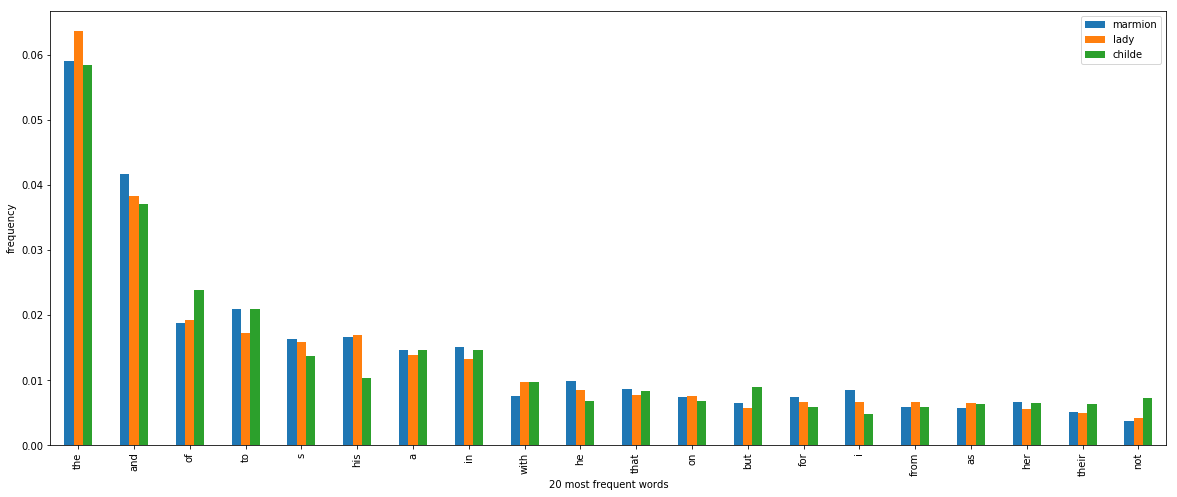

In [24]:
# Concat the three lists and get 20 most frequent words in entire corpus
corpus = data['marmion'] + data['lady'] + data['childe']
c = Counter(corpus)
most_frequent = [ x[0] for x in c.most_common(20) ]    

# Count their relative frequencies in each particular poem 
frequencies = defaultdict(lambda: defaultdict(int))
for poem in data:
    for word in data[poem]:
        if word in most_frequent:      
            frequencies[poem][word] += 1/len(data[poem])

# Print the frequencies chart
df = pd.DataFrame.from_dict(frequencies).reindex(most_frequent).reindex(
    sorted(frequencies.keys(), reverse=True), axis=1
)
ax = df.plot.bar(figsize=(20,8), color=['#1f77b4', '#ff7f0e', '#2ca02c'], xticks=range(20));
ax.set_xlabel("20 most frequent words")
ax.set_ylabel("frequency");

<h3>Relative frequencies to z-scores</h3>

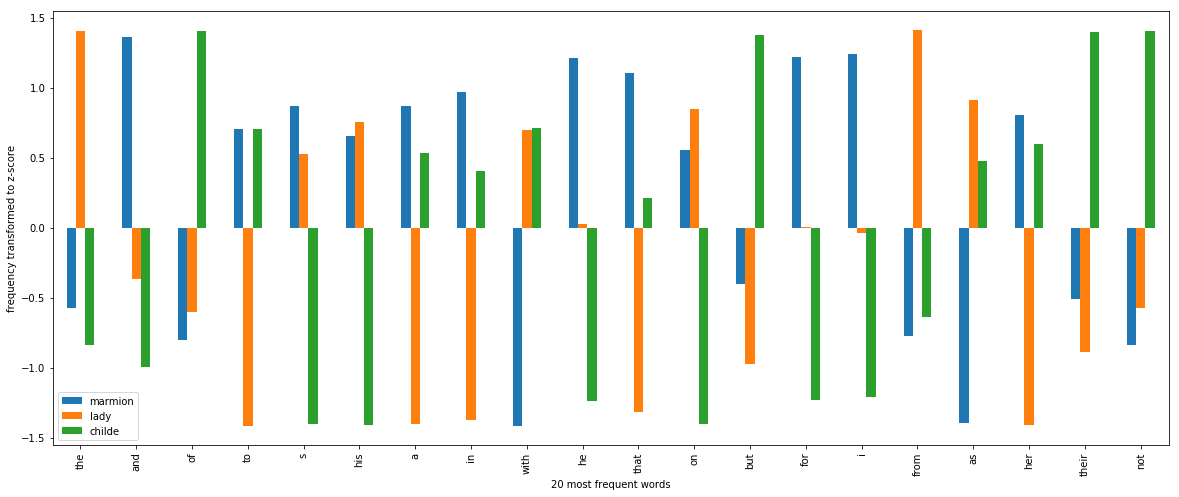

In [25]:
zscores = defaultdict(dict)

# Iterate over most frequent words
for word in most_frequent:

    # Calculate mean and standard deviation of its frequencies across poems
    distribution = [frequencies['childe'][word], frequencies['marmion'][word], frequencies['lady'][word]]
    mean = sum(distribution) / len(distribution)
    stddev = (sum([(x-mean)**2 for x in distribution]) / len(distribution))**0.5

    # Store its z-scores
    for poem in frequencies:
        zscores[poem][word] = (frequencies[poem][word] - mean) / stddev
        
# Print z-scores chart
df = pd.DataFrame.from_dict(zscores).reindex(most_frequent).reindex(sorted(
    frequencies.keys(), reverse=True), axis=1
)
ax = df.plot.bar(figsize=(20,8), color=['#1f77b4', '#ff7f0e', '#2ca02c'], xticks=range(20));
ax.set_xlabel("20 most frequent words")
ax.set_ylabel("frequency transformed to z-score");

<h3>Delta measure</h3>

DELTA(childe) = 1.6702187476717127)
DELTA(marmion) = 1.3752470162010222)


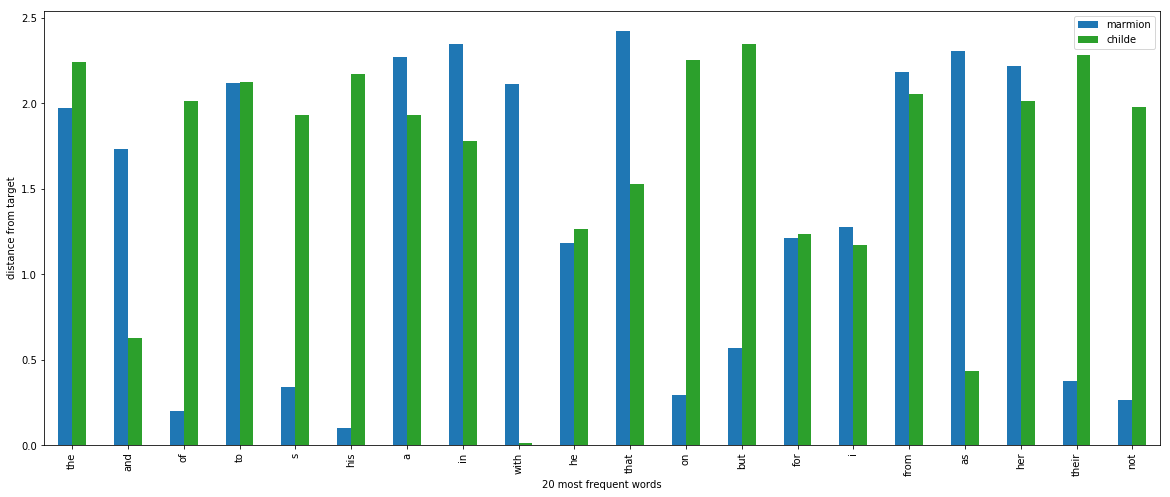

In [26]:
diffs = defaultdict(lambda: defaultdict(int))
sums = defaultdict(int)

# Iterate over most frequent words
for w in most_frequent:
    # Calculate and sum up the differences between Childe Harold / Marmion and Lady of the Lake
    for poem in ('childe', 'marmion'):
        diffs[poem][w] = abs(zscores[poem][w] - zscores['lady'][w])
        sums[poem] += diffs[poem][w] 

# Print delta measures
print('DELTA({0}) = {1})'.format('childe', sums['childe'] / len(most_frequent)))
print('DELTA({0}) = {1})'.format('marmion', sums['marmion'] / len(most_frequent)))
        
# Print z-scores chart
df = pd.DataFrame.from_dict(diffs).reindex(most_frequent).reindex(
    sorted(sums.keys(), reverse=True), axis=1
)
ax = df.plot.bar(figsize=(20,8), color=['#1f77b4', '#2ca02c'], xticks=range(20));
ax.set_xlabel("20 most frequent words")
ax.set_ylabel("distance from target");